<a href="https://colab.research.google.com/github/Bavalpreet/BMU_Notebooks/blob/main/Scraping/Scraping_Using_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The internet is an absolutely massive source of data. Unfortunately, the vast majority if it isn’t available in conveniently organized CSV files for download and analysis. If you want to capture data from many websites, you’ll need to try web scraping.

# What is Web Scraping?

Web scraping is an automated method used to extract large amounts of data from websites. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. There are different ways to scrape websites such as online Services, APIs or writing your own code. In this notebook, we’ll see how to implement web scraping with python. 

![link text](https://www.edureka.co/blog/wp-content/uploads/2018/11/Untitled-1.jpg)

Some websites offer data sets that are downloadable in `CSV` format, or accessible via an Application Programming Interface `(API)`. But many websites with useful data don’t offer these convenient options.

Consider, for example, the National Weather Service’s website. It contains up-to-date weather forecasts for every location in the US, but that weather data isn’t accessible as a CSV or via API. It has to be viewed on the NWS site.

![link text](https://www.dataquest.io/wp-content/uploads/2019/01/nws.png)

If we wanted to analyze this data, or download it for use in some other app, we wouldn’t want to painstakingly copy-paste everything. Web scraping is a technique that lets us use programming to do the heavy lifting. We’ll write some code that looks at the NWS site, grabs just the data we want to work with, and outputs it in the format we need.

#How Does Web Scraping Work?

When we scrape the web, we write code that sends a request to the server that’s hosting the page we specified. Generally, our code downloads that page’s source code, just as a browser would. But instead of displaying the page visually, it filters through the page looking for HTML elements we’ve specified, and extracting whatever content we’ve instructed it to extract.

For example, if we wanted to get all of the titles inside H2 tags from a website, we could write some code to do that. Our code would request the site’s content from its server and download it. Then it would go through the page’s HTML looking for the H2 tags. Whenever it found an H2 tag, it would copy whatever text is inside the tag, and output it in whatever format we specified.

To extract data using web scraping with python, you need to follow these basic steps:

- Find the URL that you want to scrape
- Inspecting the Page
- Find the data you want to extract
- Write the code
- Run the code and extract the data
- Store the data in the required format 

#Is web Scraping Legal?


Before scraping any website, we should look for a terms and conditions page to see if there are explicit rules about scraping. If there are, we should follow them. If there are not, then it becomes more of a judgement call. Some websites allow web scraping and some don’t. To know whether a website allows web scraping or not, you can look at the website’s <font color='green'>“robots.txt” </font> file. You can find this file by appending `“/robots.txt”` to the URL that you want to scrape.

[Flipkart's robot.txt file](http://www.flipkart.com/robots.txt)

Remember, though, that web scraping consumes server resources for the host website. `If we’re just scraping one page once, that isn’t going to cause a problem. But if our code is scraping 1,000 pages once every ten minutes, that could quickly get expensive for the website owner`.

Thus, in addition to following any and all explicit rules about web scraping posted on the site, it’s also a good idea to follow these best practices:

- Never scrape more frequently than you need to
- Consider caching the content you scrape so that it’s only downloaded once as you work on the code you’re using to filter and analyze it, rather than re-downloading every time you run your code
- Consider building pauses into your code using functions like `time.sleep()` to keep from overwhelming servers with too many requests in too short a timespan.

In our case for this tutorial, the `NWS’s data` is public domain and its terms do not forbid web scraping, so we’re in the clear to proceed.

# The Components of a Web Page


When we visit a web page, our web browser makes a request to a web server. This request is called a `GET` request, since we’re getting files from the server. The server then sends back files that tell our browser how to render the page for us. The files fall into a few main types:

`HTML` — contain the main content of the page.

`CSS` — add styling to make the page look nicer.

`JS` — Javascript files add interactivity to web pages.

`Images` — image formats, such as JPG and PNG allow web pages to show pictures.

After our browser receives all the files, it renders the page and displays it to us. There’s a lot that happens behind the scenes to render a page nicely, but we don’t need to worry about most of it when we’re web scraping. When we perform web scraping, we’re interested in the main content of the web page, so we look at the HTML.

#Brief overview of HTML

Let’s take a quick tour through HTML so we know enough to scrape effectively.

The most basic tag is the `<html>` tag. This tag tells the web browser that everything inside of it is HTML. We can make a simple HTML document just using this tag:

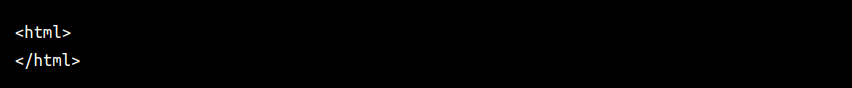

We haven’t added any content to our page yet, so if we viewed our HTML document in a web browser, we wouldn’t see anything:

Right inside an html tag, we put two other tags, the `head` tag, and the `body` tag. <font color='blue'>The main content of the web page goes into the body tag</font>. The head tag contains data about the title of the page, and other information that generally isn’t useful in web scraping:

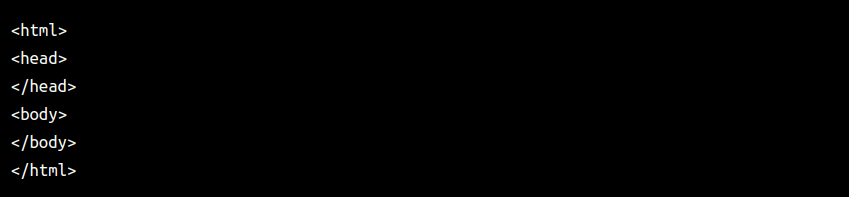

We still haven’t added any content to our page (that goes inside the body tag), so we again won’t see anything:

You may have noticed above that we put the head and body tags inside the html tag. In HTML, tags are nested, and can go inside other tags.

We’ll now add our first content to the page, in the form of the `p` tag. <font color = 'blue'>The `p` tag defines a paragraph, and any text inside the tag is shown as a separate paragraph</font>:

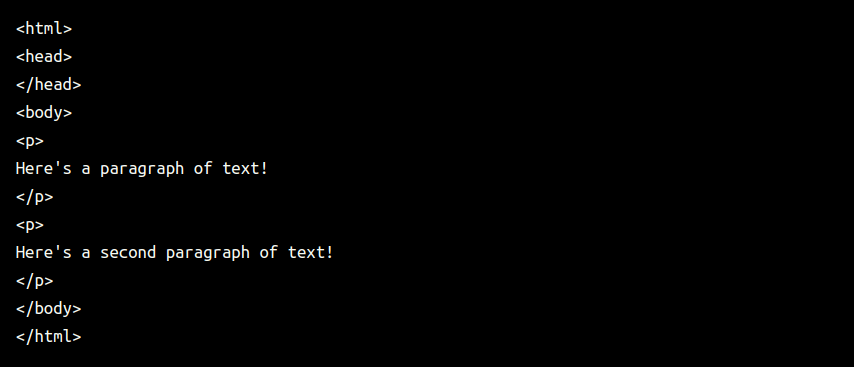

Here’s how this will look:

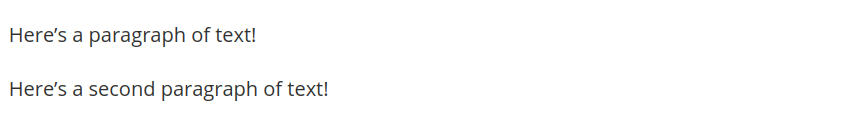

Tags have commonly used names that depend on their position in relation to other tags:

- `child` — a child is a tag inside another tag. So the two p tags above are both children of the body tag.
- `parent` — a parent is the tag another tag is inside. Above, the html tag is the parent of the body tag.
- `sibiling` — a sibiling is a tag that is nested inside the same parent as another tag. For example, head and body are siblings, since they’re both inside html. Both p tags are siblings, since they’re both inside body.


We can also add properties to HTML tags that change their behavior:

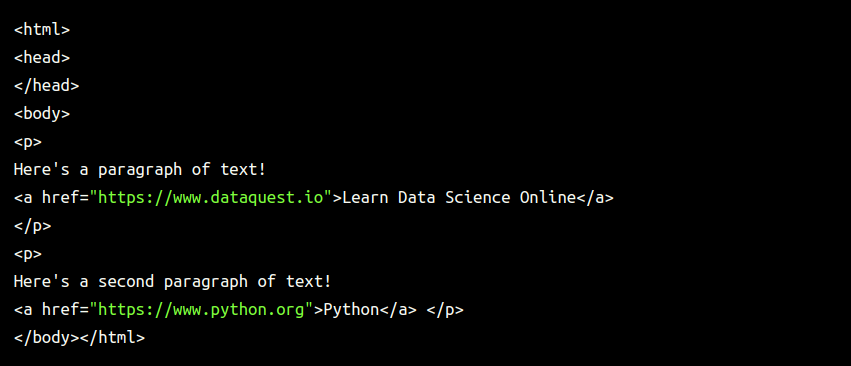

Here’s how this will look:

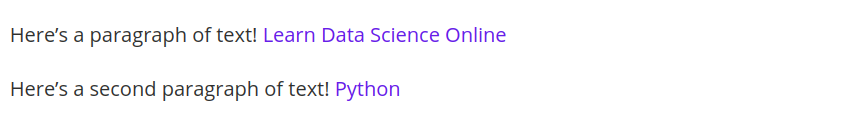

n the above example, we added two `a` tags. `a` tags are links, and tell the browser to render a link to another web page. The `href` property of the tag determines where the link goes.

# The requests library

The first thing we’ll need to do to scrape a web page is to download the page. We can download pages using the Python [requests](https://2.python-requests.org/en/latest/) library. The requests library will make a **`GET`** request to a web server, which will download the HTML contents of a given web page for us. There are several different types of requests we can make using requests, of which **`GET`** is just one.

Let’s try downloading a simple sample website, [](https://)http://dataquestio.github.io/web-scraping-pages/simple.html. We’ll need to first download it using the `requests.get` method.

In [ ]:
import requests
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

After running our request, we get a [Response](https://2.python-requests.org/en/master/user/quickstart/#response-content) object. This object has a status_code property, which indicates if the page was downloaded successfully:

In [ ]:
page.status_code

200

**NOTE** Status_code of `200` means that the page downloaded successfully. We won’t fully dive into status codes here, but a status code starting with a <font color = 'green'>`2`</font> generally indicates success, and a code starting with a <font color = 'red'>`4`</font> or a <font color = 'red'>`5`</font> indicates an error.

We can print out the HTML content of the page using the **`content`** property:



In [ ]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

# Parsing a page with BeautifulSoup

We can use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) library to parse this document, and extract the text from the `p` tag. We first have to import the library, and create an instance of the BeautifulSoup class to parse our document:

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

We can now print out the HTML content of the page, formatted nicely, using the `prettify` method on the BeautifulSoup object:

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


As all the tags are nested, we can move through the structure one level at a time. We can first select all the elements at the top level of the page using the `children` property of `soup`. Note that `children` returns a list generator, so we need to call the `list` function on it:

In [ ]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

The above tells us that there are two tags at the top level of the page — the initial `<!DOCTYPE html>` tag, and the `<html>` tag. There is a newline character (n) in the list as well. Let’s see what the type of each element in the list is:

In [ ]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

As you can see, all of the items are **`BeautifulSoup`** objects. The first is a **`Doctype`** object, which contains information about the type of the document. The second is a **`NavigableString`**, which represents text found in the HTML document. The final item is a **`Tag`** object, which contains other nested tags. The most important object type, and the one we’ll deal with most often, is the Tag object.

The **`Tag`** object allows us to navigate through an HTML document, and extract other tags and text. You can learn more about the various **`BeautifulSoup`** objects [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#kinds-of-objects).

In [ ]:
html = list(soup.children)[2]

In [ ]:
html

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

Each item in the list returned by the children property is also a BeautifulSoup object, so we can also call the children method on html.

Now, we can find the children inside the html tag:

In [ ]:
list(html.children)

['\n', <head>
 <title>A simple example page</title>
 </head>, '\n', <body>
 <p>Here is some simple content for this page.</p>
 </body>, '\n']

As you can see above, there are two tags here, head, and body. We want to extract the text inside the `p` tag, so we’ll dive into the body:

In [ ]:
body = list(html.children)[3]

In [ ]:
body

<body>
<p>Here is some simple content for this page.</p>
</body>

Now, we can get the `p` tag by finding the children of the `body` tag:

In [ ]:
list(body.children)

['\n', <p>Here is some simple content for this page.</p>, '\n']

We can now isolate the p tag:

In [ ]:
p = list(body.children)[1]

Once we’ve isolated the tag, we can use the `get_text` method to extract all of the text inside the tag:

In [ ]:
p.get_text()

'Here is some simple content for this page.'

# Finding all instances of a tag at once

What we did above was useful for figuring out how to navigate a page, but it took a lot of commands to do something fairly simple. If we want to extract a single tag, we can instead use the find_all method, which will `find all` the instances of a tag on a page.

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

Note that **`find_all`** returns a list, so we’ll have to loop through, or use list indexing, it to extract text:

In [ ]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

If you instead only want to find the first instance of a tag, you can use the **`find`** method, which will return a single BeautifulSoup object:

In [ ]:
soup.find('p')

<p>Here is some simple content for this page.</p>

# Searching for tags by class and id

Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. We can also use them when scraping to specify specific elements we want to scrape. To illustrate this principle, we’ll work with the following page:

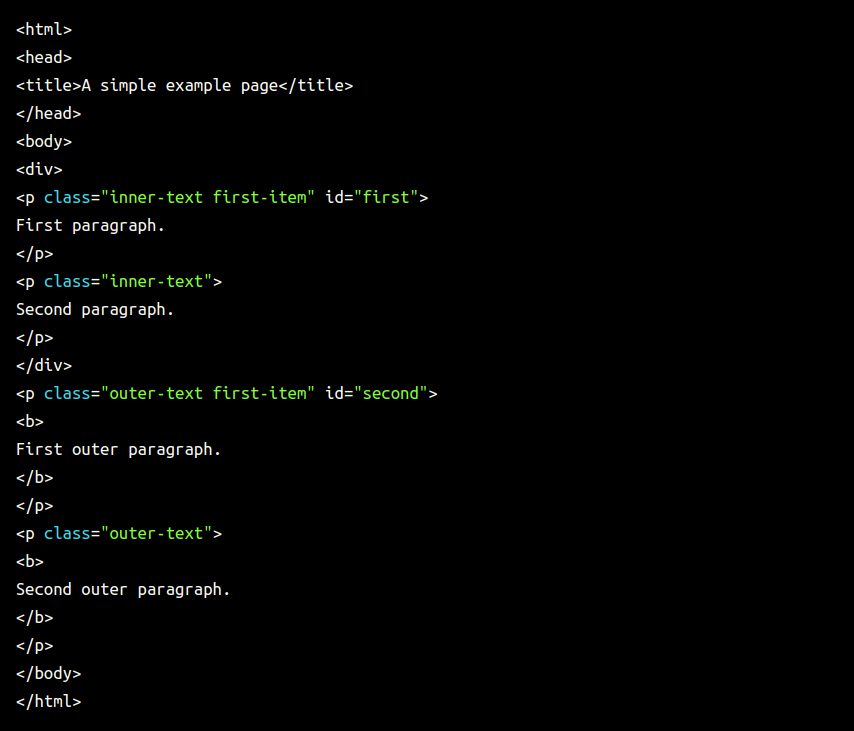

We can access the above document at the URL http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html. Let’s first download the page and create a `BeautifulSoup` object:

In [ ]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

Now, we can use the **`find_all`** method to search for items by class or by id. In the below example, we’ll search for any **`p`** tag that has the class **`outer-text`**:

In [ ]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In the below example, we’ll look for any tag that has the class `outer-text`:

In [ ]:
soup.find_all(class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

We can also search for elements by id:

In [ ]:
soup.find_all(id = 'first')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

# Using CSS Selectors

You can also search for items using CSS selectors. These selectors are how the CSS language allows developers to specify HTML tags to style. Here are some examples:

- p a — finds all a tags inside of a p tag.
- body p a — finds all a tags inside of a p tag inside of a body tag.
- html body — finds all body tags inside of an html tag.
- p.outer-text — finds all p tags with a class of outer-text.
- p#first — finds all p tags with an id of first.
- body p.outer-text — finds any p tags with a class of outer-text inside of a body tag.
You can learn more about CSS selectors [here](https://developer.mozilla.org/en-US/docs/Learn/CSS/Building_blocks/Selectors).

BeautifulSoup objects support searching a page via CSS selectors using the **`select`** method. We can use CSS selectors to find all the **`p`** tags in our page that are inside of a **`div`** like this:

In [ ]:
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>, <p class="inner-text">
                 Second paragraph.
             </p>]

**Note** that the select method above returns a list of `BeautifulSoup` objects, just like **find** and **find_all**.

# Downloading weather data


We now know enough to proceed with extracting information about the local weather from the National Weather Service website. The first step is to find the page we want to scrape. We’ll extract weather information about downtown San Francisco from [this page](https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.X12k4nUzZH4).

![link text](https://www.dataquest.io/wp-content/uploads/2019/01/extended_forecast.png)

We’ll extract data about the extended forecast.

As you can see from the image, the page has information about the extended forecast for the next week, including time of day, temperature, and a brief description of the conditions.

# Exploring page structure

![link text](https://www.dataquest.io/wp-content/uploads/2019/01/devtools.png)

The elements panel will show you all the HTML tags on the page, and let you navigate through them

By right clicking on the page near where it says “Extended Forecast”, then clicking “Inspect”, we’ll open up the tag that contains the text “Extended Forecast” in the elements panel:

![link text](https://www.dataquest.io/wp-content/uploads/2019/01/ex_selected.png)

The div that contains the extended forecast items.

If you click around on the console, and explore the div, you’ll discover that each forecast item (like “Tonight”, “Thursday”, and “Thursday Night”) is contained in a **`div`** with the class **`tombstone-container`**.

We now know enough to download the page and start parsing it. In the below code, we:

- Download the web page containing the forecast.
- Create a BeautifulSoup class to parse the page.
- Find the div with id seven-day-forecast, and assign to seven_day
- Inside seven_day, find each individual forecast item.
- Extract and print the first forecast item.

In [ ]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Overnight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Overnight: Areas of smoke. Cloudy, with a low around 57. West southwest wind 6 to 9 mph. " class="forecast-icon" src="newimages/medium/nfu.png" title="Overnight: Areas of smoke. Cloudy, with a low around 57. West southwest wind 6 to 9 mph. "/>
 </p>
 <p class="short-desc">
  Areas Smoke
 </p>
 <p class="temp temp-low">
  Low: 57 °F
 </p>
</div>


In [ ]:
len(forecast_items)

9

# Extracting information from the page

As you can see, inside the forecast item NOW Until is all the information we want. 

- The name of the forecast item — in this case, NOW Until.
- The description of the conditions — this is stored in the title property of img.
- A short description of the conditions — in this case, Dense Fog Advisory.

In [ ]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
# temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
# print(temp)

Overnight
Areas Smoke


# Extracting all the information from the page


Now that we know how to extract each individual piece of information, we can combine our knowledge with css selectors and list comprehensions to extract everything at once.

In the below code, we:

- Select all items with the class period-name inside an item with the class tombstone-container in seven_day.
- Use a list comprehension to call the get_text method on each BeautifulSoup object.

In [ ]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Overnight',
 'Monday',
 'MondayNight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight']

# Combining our data into a Pandas Dataframe

We can now combine the data into a Pandas DataFrame and analyze it

In order to do this, we’ll call the DataFrame class, and pass in each list of items that we have. We pass them in as part of a dictionary. Each dictionary key will become a column in the DataFrame, and each list will become the values in the column:

In [ ]:
import pandas as pd
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs
})
weather

,period,short_desc
0,Overnight,Areas Smoke
1,Monday,Haze
2,MondayNight,Haze
3,Tuesday,Haze
4,TuesdayNight,Slight ChanceRain
5,Wednesday,Mostly Sunny
6,WednesdayNight,Partly Cloudy
7,Thursday,Mostly Sunny
8,ThursdayNight,Partly Cloudy
